# Darstellung des Beispielfalls für Hartwigs HRV-Paper

Wir haben den Fall ausgewählt, der am Thüringer Wald 12:55 und 13:55 UTC auslöst. Für eine Darstellung, müssen wir zuerst ein paar Pakete und dann die HACI-Fälle für diesen Tag laden.

In [9]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

from standard_config import *

from io_tools import radolan as rado
import datetime as dt

In [24]:
haci_path = "{}/HACI_bbox_data".format(local_data_path)
haci_bbox_data = pd.read_csv("{}/haci_cases_2013.csv".format(haci_path))

In [25]:
haci_bbox_data.head()

,date,time,id,flags,t0,t1,l00,l01,c00,c01,l0,l1,c0,c1
0,2013-12-31,10:35,229,0,127,128,262,263,151,152,262,263,151,152
1,2013-12-31,10:35,230,0,127,128,302,304,391,392,302,304,391,392
2,2013-12-31,10:35,231,0,127,128,362,363,280,281,362,363,280,281
3,2013-12-31,10:35,232,0,127,128,369,370,251,252,369,370,251,252
4,2013-12-31,10:40,233,0,128,129,376,377,358,359,376,377,358,359


In [26]:
haci_subset = haci_bbox_data[haci_bbox_data.date=='2013-06-18']

In [30]:
haci_subset = haci_subset[haci_subset.t1 - haci_subset.t0 > 5]

In [31]:
haci_subset

,date,time,id,flags,t0,t1,l00,l01,c00,c01,l0,l1,c0,c1
99099,2013-06-18,05:10,770,0,62,68,509,510,775,776,509,510,775,776
99256,2013-06-18,06:20,927,0,76,82,427,428,770,771,427,428,770,771
99268,2013-06-18,06:25,939,0,77,83,487,488,346,347,487,488,346,347
99415,2013-06-18,07:40,1086,0,92,98,291,295,577,580,286,296,572,581
99444,2013-06-18,07:55,1115,0,95,101,214,216,582,584,213,218,580,584
99462,2013-06-18,08:00,1133,0,96,102,477,478,544,545,476,479,543,546
99475,2013-06-18,08:05,1146,0,97,103,293,297,604,610,292,297,603,610
99784,2013-06-18,11:00,1455,0,132,138,738,739,308,309,737,739,307,310
99791,2013-06-18,11:10,1462,0,134,140,228,230,784,787,223,235,783,799
99831,2013-06-18,11:35,1502,0,139,145,201,203,813,815,198,208,810,818


In [36]:
case = haci_subset[haci_subset.time=='12:55']

In [37]:
case

,date,time,id,flags,t0,t1,l00,l01,c00,c01,l0,l1,c0,c1
99943,2013-06-18,12:55,1614,0,155,161,393,396,625,628,391,398,625,635


In [49]:
r = rado.Radolan()
r.read_nc(dt.datetime(2013,6,18,13,55))

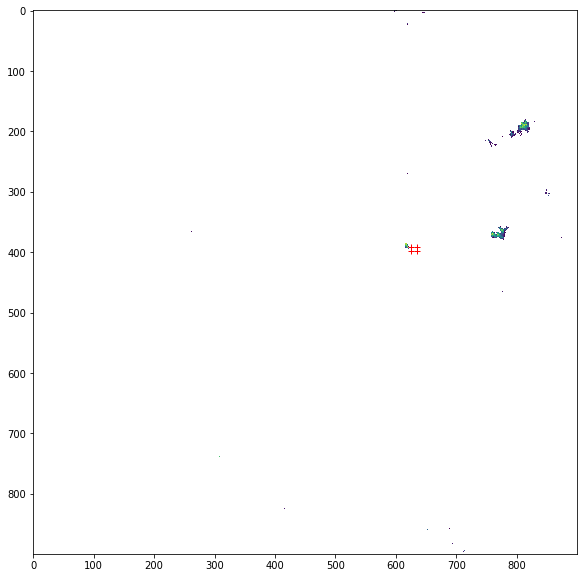

In [50]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.imshow(np.ma.masked_less(r.data,35))
ax.plot(case.c0,case.l0,'r+')
ax.plot(case.c0,case.l1,'r+')
ax.plot(case.c1,case.l0,'r+')
ax.plot(case.c1,case.l1,'r+')